<a href="https://colab.research.google.com/github/Natakorn-L/Python-for-investing/blob/main/DCA_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import yfinance as yf
from pandas.tseries.offsets import MonthBegin
import numpy as np

In [2]:
def yfinance(asset='BTC-USD',start='2022-01-01',end='2024-01-01'):
    data = yf.download(asset,start ,end )
    data.columns = ['open','high','low','close','adj close','volume']
    data = data[['volume','open','high','low','close']]
    data.index.names = ['date']
    return data

## DCA Function

In [3]:
# DCA Function

def perform_dca(df_stock):
    df_stock['Date'] = pd.to_datetime(df_stock['Date'])
    df_stock.set_index('Date', inplace=True)

    initial_asset_amount = 0
    initial_cash = 0
    monthly_investment = 1000

    current_asset_amount_stock = initial_asset_amount
    current_cash_stock = initial_cash
    total_investment_stock = 0

    asset_amount_history_stock = []
    asset_value_history_stock = []
    investment_history_stock = []

    df_stock_day_end_filtered = df_stock['Close'].resample('D').last().dropna()

    last_invested_month = None

    for i, (date, closing_price) in enumerate(df_stock_day_end_filtered.iteritems()):
        current_month = date.to_period('M')

        if last_invested_month is None or current_month != last_invested_month:
            asset_acquired = monthly_investment / closing_price
            current_asset_amount_stock += asset_acquired
            total_investment_stock += monthly_investment
            last_invested_month = current_month

        current_asset_value_stock = current_asset_amount_stock * closing_price
        asset_amount_history_stock.append(current_asset_amount_stock)
        asset_value_history_stock.append(current_asset_value_stock)
        investment_history_stock.append(total_investment_stock)

    dca_results_stock_daily = pd.DataFrame({
        'Date': df_stock_day_end_filtered.index,
        'Closing_Price': df_stock_day_end_filtered.values,
        'Asset_Amount': asset_amount_history_stock,
        'Asset_Value': asset_value_history_stock,
        'Total_Investment': investment_history_stock
    })

    final_total_investment_stock = dca_results_stock_daily['Total_Investment'].iloc[-1]
    initial_closing_price_stock = dca_results_stock_daily['Closing_Price'].iloc[0]
    lump_sum_values_stock = final_total_investment_stock * (dca_results_stock_daily['Closing_Price'] / initial_closing_price_stock)
    dca_results_stock_daily['Lump_Sum_Value'] = lump_sum_values_stock

    initial_asset_amount_lump_sum = final_total_investment_stock / initial_closing_price_stock
    dca_results_stock_daily['Asset_Amount_Lump_Sum'] = [initial_asset_amount_lump_sum] * len(dca_results_stock_daily)

    return dca_results_stock_daily


## Data

In [4]:
asset = '^IXIC'
start='2021-01-01'
end='2025-01-01'

In [5]:
# Load Stock data
df_stock = df = yf.download(asset,start=start,end=end)
df_stock.reset_index(inplace=True)

dca_results_stock = perform_dca(df_stock)
dca_results_stock.set_index('Date', inplace=True)


[*********************100%%**********************]  1 of 1 completed


<ipython-input-3-2d7065743bc4>:23: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (date, closing_price) in enumerate(df_stock_day_end_filtered.iteritems()):


In [6]:
dca_results_stock

,Closing_Price,Asset_Amount,Asset_Value,Total_Investment,Lump_Sum_Value,Asset_Amount_Lump_Sum
Date,,,,,,
2021-01-04,12698.450195,0.078750,1000.000000,1000,34000.000000,2.677492
2021-01-05,12818.959961,0.078750,1009.490116,1000,34322.663945,2.677492
2021-01-06,12740.790039,0.078750,1003.334253,1000,34113.364597,2.677492
2021-01-07,13067.480469,0.078750,1029.061048,1000,34988.075639,2.677492
2021-01-08,13201.980469,0.078750,1039.652892,1000,35348.198326,2.677492
...,...,...,...,...,...,...
2023-10-11,13659.679688,2.611301,35669.540461,34000,36573.684366,2.677492
2023-10-12,13574.219727,2.611301,35446.378747,34000,36344.865996,2.677492
2023-10-13,13407.230469,2.611301,35010.319467,34000,35897.753578,2.677492


## Metric

In [7]:
dca = dca_results_stock.copy()
dca['asset_ret'] = dca['Asset_Value']/dca['Total_Investment']-1
dca['lump_sum_ret'] = dca['Lump_Sum_Value']/dca['Total_Investment'][-1]-1
dca['asset_daily_ret'] = dca['Asset_Value'].pct_change()
dca['lump_sum_daily_ret'] = dca['Lump_Sum_Value'].pct_change()



In [8]:
Asset_Value = dca['Asset_Value']
Lump_Sum_Value =  dca['Lump_Sum_Value']
print(f'DCA NAV : {Asset_Value[-1]:.2f} ')
print(f'Lump Sum NAV : {Lump_Sum_Value[-1]:.2f} ')

DCA NAV : 35348.87 
Lump Sum NAV : 36244.89 


In [9]:
asset_ret = dca['asset_ret']
lump_ret = dca['lump_sum_ret']
print(f'DCA Return : {asset_ret[-1]:.2%} ')
print(f'Lump Sum Return : {lump_ret[-1]:.2%} ')

DCA Return : 3.97% 
Lump Sum Return : 6.60% 


In [10]:
vol_lump = dca['lump_sum_daily_ret'].rolling(252).std()
vol_asset =  dca['asset_daily_ret'].rolling(252).std()
mean_lump = dca['lump_sum_daily_ret'].rolling(252).mean()
mean_asset = dca['asset_daily_ret'].rolling(252).mean()
sharpe_lump =mean_lump / vol_lump * np.sqrt(252)
sharpe_asset = mean_asset/  vol_asset * np.sqrt(252)

In [11]:
dd_asset = dca['Asset_Value']/dca['Asset_Value'].cummax()-1
dd_lump = dca['Lump_Sum_Value']/dca['Lump_Sum_Value'].cummax()-1
print(f'DCA Drawdown : {dd_asset.min():.2%}')
print(f'Lump sum Drawdown : {dd_lump.min():.2%}')

DCA Drawdown : -16.98%
Lump sum Drawdown : -36.40%


In [12]:
print(f'DCA Sharpe Ratio : {sharpe_asset[-1]:.2f}')
print(f'Lump Sum Sharpe Ratio : {sharpe_lump[-1]:.2f}')

DCA Sharpe Ratio : 3.06
Lump Sum Sharpe Ratio : 1.38


##Ploting

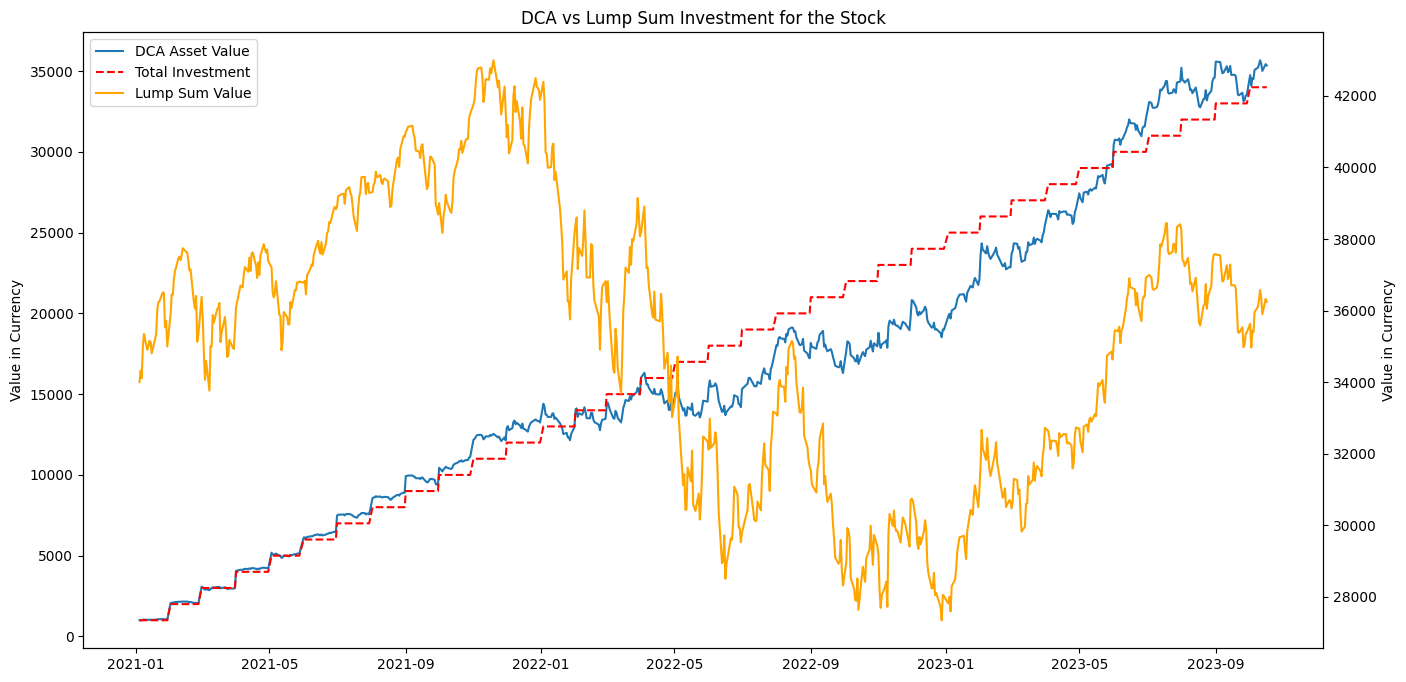

In [13]:
# Visualization


fig, ax = plt.subplots(1, figsize=(16, 8))

# Plot data on the first axis
line1, = ax.plot(dca_results_stock.index, dca_results_stock['Asset_Value'], label='DCA Asset Value')
line2, = ax.plot(dca_results_stock.index, dca_results_stock['Total_Investment'], label='Total Investment', linestyle='--', color='r')

# Create second axis
ax2 = ax.twinx()

# Plot data on the second axis
line3, = ax2.plot(dca_results_stock.index, dca_results_stock['Lump_Sum_Value'], color='orange', label='Lump Sum Value')

# Labels and title
plt.xlabel('Date')
ax.set_ylabel('Value in Currency')
ax2.set_ylabel('Value in Currency')
plt.title('DCA vs Lump Sum Investment for the Stock')

# Combine legends from both axes
lines = [line1, line2, line3]
labels = [l.get_label() for l in lines]
ax.legend(lines, labels)

plt.show()


In [14]:
dd_asset_mean = dd_asset.mean()
print(f'Mean Drawdown : {dd_asset_mean:.2%}')

Mean Drawdown : -3.21%


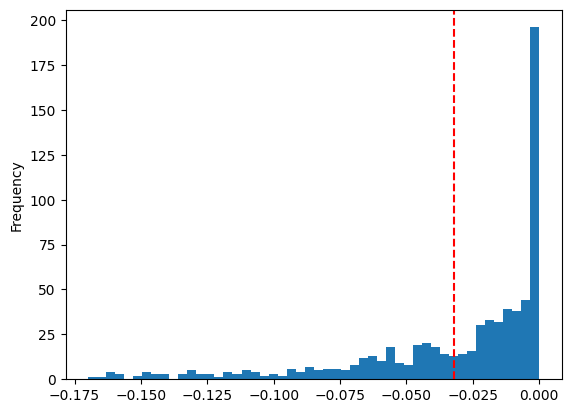

In [15]:
dd_asset.plot.hist(bins=50)
plt.axvline(dd_asset_mean,linestyle='--',color='r')

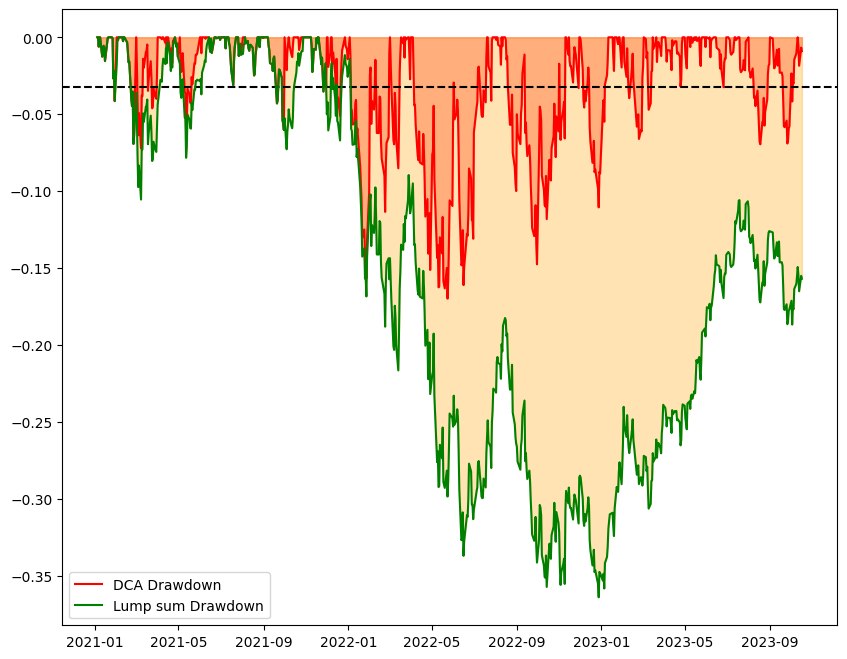

In [16]:
fig,(ax) = plt.subplots(figsize=(10,8))
ax.plot(dd_asset,color='r',label='DCA Drawdown')
ax.fill_between(dca.index,dd_asset,0,color='r',alpha=0.3)
plt.axhline(dd_asset_mean,linestyle='--',color='k')


ax.plot(dd_lump,color='g',label='Lump sum Drawdown')
ax.fill_between(dca.index,dd_lump,0,color='orange',alpha=0.3)

plt.legend()



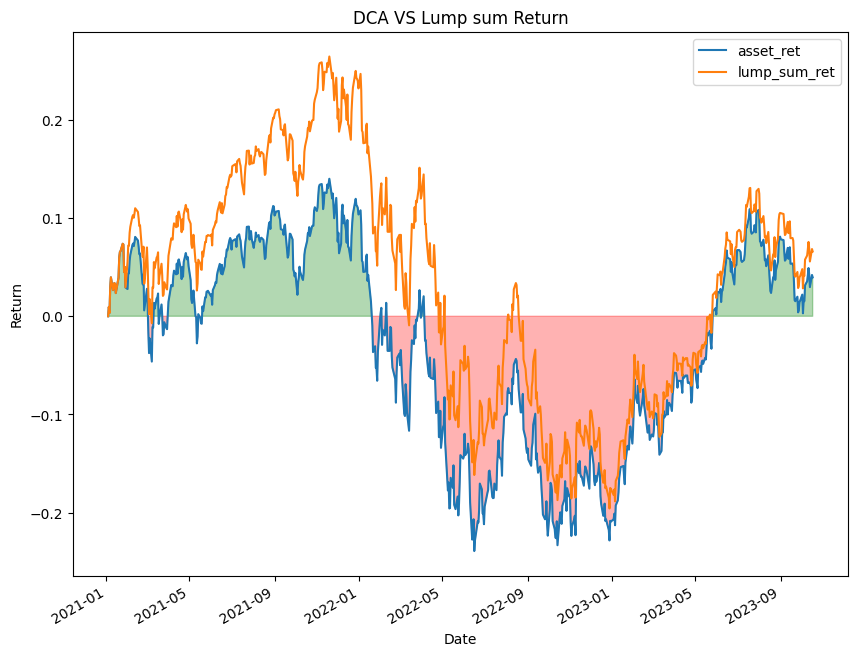

In [17]:
plt.figure(figsize=(10,8))
dca['asset_ret'].plot()
dca['lump_sum_ret'].plot()
plt.fill_between(dca.index,dca['asset_ret'],0,where=(dca['asset_ret'] > 0), interpolate=True, color='g', alpha=0.3)
plt.fill_between(dca.index,dca['asset_ret'],0,where=(dca['asset_ret'] < 0), interpolate=True, color='r', alpha=0.3)
plt.legend()
plt.title('DCA VS Lump sum Return')
plt.ylabel('Return')
plt.xlabel('Date')
plt.show()


In [18]:
min_ret = dca['asset_ret'].min()
min_lump_ret = dca['lump_sum_ret'].min()
print(f'Min Return : {min_ret:.2%}')
print(f'Min Lump Sum Return : {min_lump_ret:.2%}')

Min Return : -23.91%
Min Lump Sum Return : -19.57%
